# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=Clean_Dataset.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
path1 = '/Users/claywrentz/Desktop/ML-Fontenot/MLProject2/Dataset1/train.xlsx' 
path2 = '/Users/claywrentz/Desktop/ML-Fontenot/MLProject2/Dataset2.csv'

flight1 = pd.read_excel(path1)
flight2 = pd.read_csv(path2)

The first data set contains data on airfare prices for different flights, I can't find where the data was scraped from however I got it from [this](https://www.kaggle.com/datasets/zwartfreak/airline-fare-prediction?select=train.xlsx) link. It is split into a train and test set. The train set has 10,683 entries and the test set has 2,671 entries. Both sets have 11 different attributes. For this analysis I will only be using the train set. The prediction attribute is price. This data set uses numbers to represent the time of day. 

In [3]:
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


The second data set also contains data on airfare prices for different flights, but specifically focuses on flight travel between India's top 6 metro cities. This data is collected from the website "Easemytrip" and I found it at [this](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=Clean_Dataset.csv) link. This dataset uses categories to represent the time of day (morning, evening, etc.). This datasets prediction attribute is also price. This dataset has 300,153 entries and 11 different attributes. 



In [4]:
flight2.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Questions 

1. Is there any trend based on what day of the week you buy a flight and how much it costs.

2. What are the most expensive regions to fly to?

3. Is there a major price difference between flights that have stops and flights that don't?

4. How/why do prices vary with different airlines?



### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

### Data Set 1

In [5]:
flight1.columns = [c.replace(' ', '_') for c in flight1.columns]
flight1.info()
flight1.shape
flight1.Additional_Info.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

**Airline:** Nominal categorical variable, 12 categories

**Date of Journey:** Continuous numerical variable, initially stored as a string, will be datetime
    
**Source:** Nominal categorical variable, 5 categories
    
**Destination:** Nominal categorical variable, 6 categories
    
**Route:** Nominal categorical variable, 129 categories
    
**Departure Time:** Continuous numerical variable, initially stored as a string, will be datetime
    
**Arrival Time:** Continuous numerical variable, initially stored as a string, will be datetime
    
**Duration:** Discrete numerical variable, initially stored as a string
    
**Total Stops:** Discrete numerical variable
    
**Additional Info:** Nominal categorical variable, 10 categories
    
**Price:** Discrete numerical variable, stored as an int




This dataset has 11 attributes and 10,683 entries, which is 117,513 total data points. 


In [6]:
flight1['Date_of_Journey'] = pd.to_datetime(flight1['Date_of_Journey'])
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


In [7]:
flight1 = flight1.sort_values(by='Date_of_Journey')
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
959,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,00:45 02 Mar,13h 5m,1 stop,No info,26891
6336,SpiceJet,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,15:35,23:40,8h 5m,1 stop,1 Long layover,7745
1654,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,20:20,12h 20m,1 stop,No info,27993
6321,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17136
6314,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,11:25 02 Mar,23h 45m,1 stop,No info,25736


In [8]:
flight1.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9873,Multiple carriers,2019-12-06,Delhi,Cochin,DEL → BOM → COK,09:15,19:00,9h 45m,1 stop,No info,11623
5993,IndiGo,2019-12-06,Kolkata,Banglore,CCU → MAA → BLR,08:10,13:00,4h 50m,1 stop,No info,5070
7260,Jet Airways,2019-12-06,Delhi,Cochin,DEL → BOM → COK,22:50,19:00 13 Jun,20h 10m,1 stop,No info,14715
4997,Air Asia,2019-12-06,Kolkata,Banglore,CCU → DEL → BLR,07:35,23:30,15h 55m,1 stop,No info,5193
1081,Jet Airways,2019-12-06,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 13 Jun,6h 35m,1 stop,In-flight meal not included,10263


I changed Date of Journey to a datetime object in order to have the same format for all entries. After sorting by this column, we can see that the data has dates beginning on 01/03/2019 and spanning until 12/06/2019; a timespan of about one year. We can see above that there is very few missing datapoints. Route and Total Stops are the only columns missing data and they are both missing only one entry. 

In [9]:
flight1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 959 to 1081
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.5+ KB


### Dataset 2

In [10]:
flight2.columns = [c.replace(' ', '_') for c in flight2.columns]
flight2 = flight2.drop('Unnamed:_0', 1)
flight2.info()
flight2.shape

/var/folders/sc/3djkvdx57jb0ycqsbk23w5pc0000gn/T/ipykernel_82152/4202729272.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  flight2 = flight2.drop('Unnamed:_0', 1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


(300153, 11)

In [11]:
x = flight2['class'].unique()
len(x)

2

**Airline:** Nominal categorical variable, 6 categories

**Flight:** Nominal categorical variable, 1561 categories

**Source City:** Nominal categorical variable, 6 categories

**Departure Time:** Ordinal categorical variable, 6 categories

**Stops:** Discrete numerical variable, initially stored as a string (not an int)

**Arrival Time:** Ordinal categorical variable, 6 categories

**Destination City:** Nominal categorical variable, 6 categories

**Class:** Nominal categorical variable, 2 categories

**Duration:** Continuous numerical variable, stored as float

**Days Left:** Discrete numerical variable, stored as int

**Price:** Discrete numerical variable, stored as an int

This dataset has 11 attributes and 300,153 entries, which is 3,301,683 total data points.

There are no dates included in the dataset, however using the description from Kaggle we can see this data was collected for flights departing on 02/11/2022 through 03/31/2022. This dataset is limited to a much smaller timespan, only 1.5 months. 
There is no missing data, all columns have 300,153 non-null entries. 

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

First step is to change all numeric data (that's not a date) to integers. Then we can better understand each variable.
### Dataset 1

In [12]:
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
959,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,00:45 02 Mar,13h 5m,1 stop,No info,26891
6336,SpiceJet,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,15:35,23:40,8h 5m,1 stop,1 Long layover,7745
1654,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,20:20,12h 20m,1 stop,No info,27993
6321,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17136
6314,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,11:25 02 Mar,23h 45m,1 stop,No info,25736


I started by converting the Duration column from a string to an int. I multiplied the total hours by 60 and added the minutes, so now the duration is measured in minutes. 

In [13]:
h = flight1['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
m = flight1['Duration'].str.extract('(\d+)m', expand=False).astype(float)

flight1['Duration'] = h.add(m, fill_value=0).astype(int)
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
959,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,00:45 02 Mar,785,1 stop,No info,26891
6336,SpiceJet,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,15:35,23:40,485,1 stop,1 Long layover,7745
1654,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,20:20,740,1 stop,No info,27993
6321,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,2345,2 stops,No info,17136
6314,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,11:25 02 Mar,1425,1 stop,No info,25736


I also shortened the Arrival Time column to include only the first 5 characters, meaning just the time. If I need to know what date the column is referencing I will use the duration column + departure time column. Right now the Arrival Time and Departure Time columns are still pbjects but may later be changed to datetime types. 

In [14]:
flight1['Arrival_Time'] = flight1['Arrival_Time'].str[0:5]

Next I dropped all the rows from dataset 1 that have null entries. This ended up being only one row because, as stated earlier, there are only two null entries and they happened to be in the same row. Therefore, dropping all rows with null entries has a miniscule effect on the overall data. Then, I formatted the Total stops column to only contain an int, and changed its type to int.

In [15]:
flight1 = flight1.dropna(0)
flight1['Total_Stops'] = flight1['Total_Stops'].str[0:1]
flight1['Total_Stops'] = [c.replace('n', '0') for c in flight1['Total_Stops']]
flight1['Total_Stops'] = flight1['Total_Stops'].astype(int)

/var/folders/sc/3djkvdx57jb0ycqsbk23w5pc0000gn/T/ipykernel_82152/1157681791.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  flight1 = flight1.dropna(0)


In [16]:
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
959,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,00:45,785,1,No info,26891
6336,SpiceJet,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,15:35,23:40,485,1,1 Long layover,7745
1654,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,20:20,740,1,No info,27993
6321,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55,2345,2,No info,17136
6314,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,11:40,11:25,1425,1,No info,25736


The data from dataset 1 now appears to be ready to be put into the data dictionary. 

In [17]:
flight1['Airline'].unique()

array(['Jet Airways', 'SpiceJet', 'Air India', 'IndiGo', 'Air Asia',
       'Vistara', 'GoAir', 'Jet Airways Business', 'Multiple carriers',
       'Vistara Premium economy', 'Multiple carriers Premium economy',
       'Trujet'], dtype=object)

#### Airline
This variable represents all the different airlines available for travel in dataset 1. This includes Jet Airways, SpiceJet, Air India, IndiGo, Air Asia, Vistara, GoAir, Jet Airways Business, multiple carriers, Vistara premium economy, Trujet, and multiple carriers premium economy. Multiple carriers means that multiple different airlines were taken to get to the final destination. The majority of flights were on Jet Airways.

<function matplotlib.pyplot.show(close=None, block=None)>

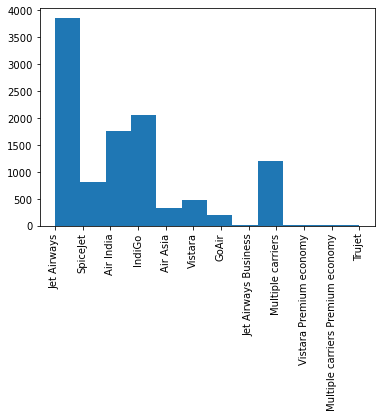

In [18]:
plt.hist(flight1['Airline'], bins = 12, density = False)
plt.xticks(rotation='vertical')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

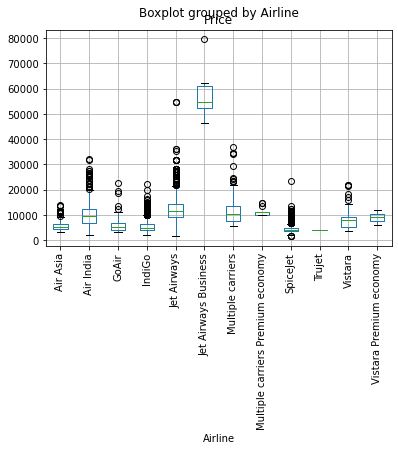

In [19]:
flight1.boxplot(column = 'Price', by = 'Airline')
plt.xticks(rotation=90)
plt.show

#### Date of Journey

This variable represents the date that the journey began, meaning the date that the flight departs. It is saved as a datetime object in the format YYYY-MM-DD. This variable is a little bit inbetween categorical and numeric. The representation of it includes numbers, however these numbers can't alone be used for calculation. You have to take other logic into account such as the number of days in a month or year. Also you can't calculate the average. The data also isn't exactly categorical because if we considered it that there would be too many categories. Although its not exactly numeric, we can still calculate the min, max, and median. The min is 01/03/2019 and the max is 12/06/2019. The median is 05/24/2019. The date with the highest number of flights was 05/18/2019.



<function matplotlib.pyplot.show(close=None, block=None)>

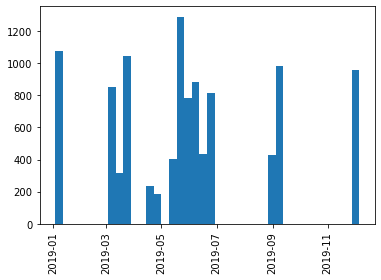

In [20]:
plt.hist(flight1['Date_of_Journey'], bins = 40, density = False)
plt.xticks(rotation='vertical')
plt.show

#### Source

This variable represents the location of which the flight is departing from. This is a categorical variable consisting of 5 categories: Banglore, Chennai, Delhi, Kolkata, and Mumbai. Most of the flights were made from Delhi, with the second most being from Banglore and Kolkata. 

<function matplotlib.pyplot.show(close=None, block=None)>

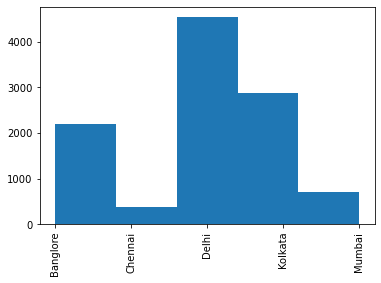

In [21]:
plt.hist(flight1['Source'], bins = 5, density = False)
plt.xticks(rotation='vertical')
plt.show

#### Destination

This variable represents the location of which the flight is landing at. This is a categorical variable consisting of 6 categories: New Delhi, Kolkata, Cochin, Banglore, Hyderabad, and Delhi. Most of the flights were made to Cochin, with Banglore coming in second. 

<function matplotlib.pyplot.show(close=None, block=None)>

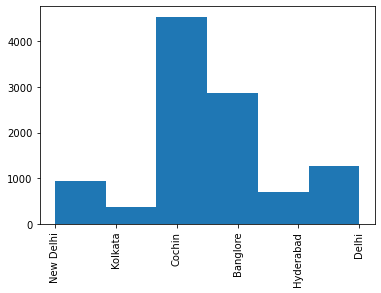

In [22]:
plt.hist(flight1['Destination'], bins = 6, density = False)
plt.xticks(rotation='vertical')
plt.show

#### Route 

This variable represents the path that was taken to get from the source to destination. It consists of the names of locations in the order of which they were reached by the flight. It is a categorical variable of 129 different categories. The most popular route is DEL -> BOM -> COK with 2,376 total flights through this path in the timespan that the data was recorded. The mean number of flights for each path is 83, with a minimum of 1. 

In [23]:
x = flight1.groupby('Route').count()
x.head()
x = x.sort_values(by='Airline')
x.tail()
x.describe()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,83.453125,83.453125,83.453125,83.453125,83.453125,83.453125,83.453125,83.453125,83.453125,83.453125
std,281.334219,281.334219,281.334219,281.334219,281.334219,281.334219,281.334219,281.334219,281.334219,281.334219
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
max,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000


#### Departure Time

This variable represents the time that the flight departed the airport on the day found in the Date of Journey column. Although this data is continuous and numeric, it is an object, not an int. You can't perform calculations with this data without taking into account the number of minutes in an hour. The histogram below makes it difficult to read the labels, however you can see that most flights depart in the morning, with the majority between 4 and 5 am.  

<function matplotlib.pyplot.show(close=None, block=None)>

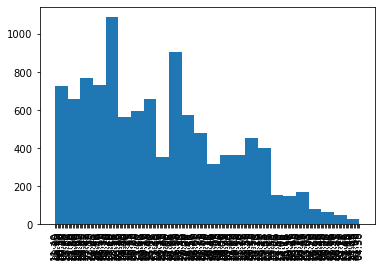

In [24]:
plt.hist(flight1['Dep_Time'], bins = 24, density = False)
plt.xticks(rotation='vertical')
plt.show

#### Arrival Time

This variable represents the time that the flight arrives at its destination. It only includes the hour and minute, not the date. If you want to know the day it arrived you can use the Departure date column along with the Duration column. Although this data is continuous and numeric, it is an object, not an int. You can't perform calculations with this data without taking into account the number of minutes in an hour. The histogram below makes it difficult to read the labels, however you can see that most flights arrive very early in the day, with the most between 4 and 5 am.

<function matplotlib.pyplot.show(close=None, block=None)>

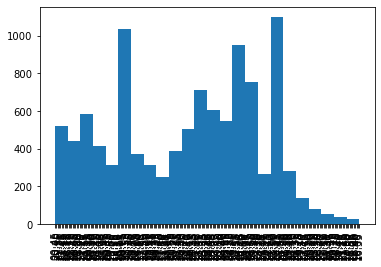

In [25]:
plt.hist(flight1['Arrival_Time'], bins = 24, density = False)
plt.xticks(rotation='vertical')
plt.show

#### Duration

This variable represents the total duration of time between the departure time and arrival time. This value is represented in minutes. It is a discrete numerical variable and represented with an integer. The minimum trip duration is 5 minutes, which seems out of the ordinary so I will inspect that. The maximum trip duration is 2860 minutes, which is nearly two days. This seems long for one trip, but these trips can include multiple flights and layovers to get to the final destination. The average trip duration is 643 minutes or nearly 11 hours. 

In [26]:
flight1.describe()

,Duration,Total_Stops,Price
count,10682.000000,10682.000000,10682.000000
mean,643.020502,0.824190,9088.214567
std,507.830133,0.675229,4611.548810
min,5.000000,0.000000,1760.000000
25%,170.000000,0.000000,5278.000000
50%,520.000000,1.000000,8373.000000
75%,930.000000,1.000000,12374.000000
max,2860.000000,4.000000,79513.000000


In [27]:
flight1 = flight1.sort_values(by='Duration')
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6474,Air India,2019-06-03,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5,2,No info,17328
10384,Air India,2019-12-05,Mumbai,Hyderabad,BOM → HYD,19:30,20:45,75,0,No info,3626
1416,Air India,2019-03-18,Mumbai,Hyderabad,BOM → HYD,19:30,20:45,75,0,No info,2051
3708,Air India,2019-01-05,Mumbai,Hyderabad,BOM → HYD,19:30,20:45,75,0,No info,3101
7239,Air India,2019-03-24,Mumbai,Hyderabad,BOM → HYD,19:30,20:45,75,0,No info,2576


In [28]:
flight1 = flight1.drop([6474])

I chose to drop the row with a trip duration of only 5 minutes. This flight had 2 stops and only a five minute difference between the departure and arrival time. This is likely where the error came from, however at this point its impossible to tell what the actual duration should be so we will drop the row. 

<function matplotlib.pyplot.show(close=None, block=None)>

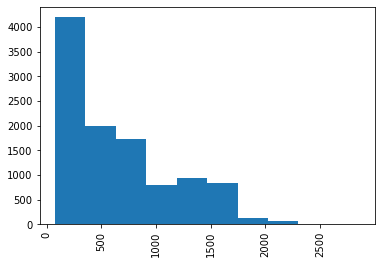

In [29]:
plt.hist(flight1['Duration'], bins = 10, density = False)
plt.xticks(rotation='vertical')
plt.show

What we see from the distribution of trip durations is expected. There are much fewer flights with a trip duration over 1000 minutes (16 hours). 

#### Total Stops

This variable represents the number of stops in between the source and destination locations. It is a discrete numerical variable represented by an integer. The min is 0, meaning a direct flight, and the max is 4. The average is nearly 1 stop, meaning most flights are not direct. 

<function matplotlib.pyplot.show(close=None, block=None)>

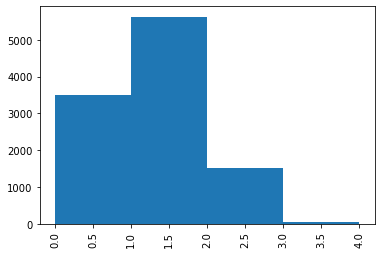

In [30]:
plt.hist(flight1['Total_Stops'], bins = 4, density = False)
plt.xticks(rotation='vertical')
plt.show

#### Additional Info

This variable represents additional info about the flight not described elsewhere. It is a nominal categorical variable with 10 different categories, however 2 categories are the same: No info and No Info, No check-in baggage included, In-flight meal not included, Red-eye flight, Business class, Change airports, 1 long layover, 1 short layover, and 2 long layover.


I have some suspicion about whether or not this variable will be very helpful. For one thing, some of its data is included in other columns, like the Route column. Also, there can only be one value inputetd for each in the data, however that might not really be the case. You could have 1 long layover, fly business class, and get no in flight meal, however the data doesn't allow you to represent all three of these. We will be able to investigate later if this variable is of any help for our price prediction. 



In [31]:
flight1['Additional_Info'] = [c.replace('No Info', 'No info') for c in flight1['Additional_Info']]
flight1['Additional_Info'].unique()

array(['No info', 'No check-in baggage included',
       'In-flight meal not included', 'Red-eye flight', 'Business class',
       'Change airports', '1 Long layover', '1 Short layover',
       '2 Long layover'], dtype=object)

[8.346e+03 3.200e+02 1.982e+03 1.000e+00 4.000e+00 7.000e+00 1.900e+01
 1.000e+00 1.000e+00]


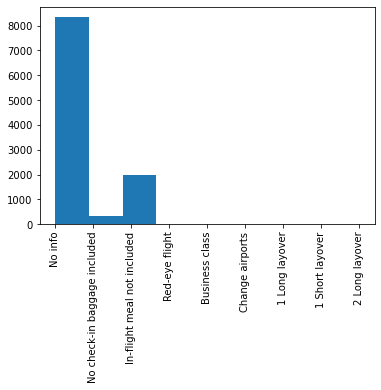

In [32]:
counts, bins, bars = plt.hist(flight1['Additional_Info'], bins = 9, density = False)
plt.xticks(rotation='vertical')
plt.show
print(counts)

I first combined the "No info" and "No Info" categories. The majority of the flights have no info in this column. The majority of these categories have less than 10 occurrences meaning they won't provide significant information.

#### Price

This variable represents the total price in Indian Rupees for the entire trip. This is a discrete numerical variable. The lowest cost of a trip was 1,760 Rupees and the max cost was 79,513 Rupees. In USD this is a span from \\$23 &ndash; \\$1,042. The mean cost was 9,087 Rupees or \\$120, which seems reasonable. There were very little flights that cost more than 30,000 Rupees.

[6.028e+03 4.390e+03 1.810e+02 6.600e+01 7.000e+00 1.000e+00 5.000e+00
 2.000e+00 0.000e+00 1.000e+00]


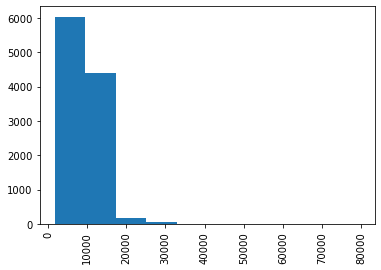

In [33]:
counts, bins, bars = plt.hist(flight1['Price'], bins = 10, density = False)
plt.xticks(rotation='vertical')
plt.show
print(counts)

### Dataset 2

In [34]:
flight2['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

#### Airline

This variable represents all the different airlines available for travel in dataset 2. This includes SpiceJet, AirAsia, Vistara, GO_FIRST, Indigo, and Air India. The most popular airlines from this collection of data was Vistara, Air India and Indigo.

[6.028e+03 4.390e+03 1.810e+02 6.600e+01 7.000e+00 1.000e+00 5.000e+00
 2.000e+00 0.000e+00 1.000e+00]


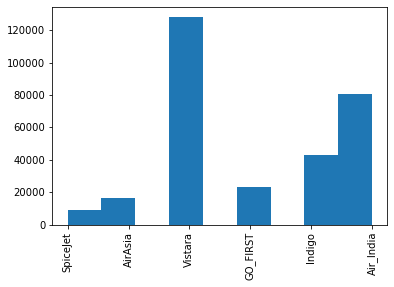

In [35]:
plt.hist(flight2['airline'], bins = 9, density = False)
plt.xticks(rotation='vertical')
plt.show
print(counts)

#### Flight

This variable represents the flight code for each flight taken. This is a nominal categorical variable with 1,561 categories.

In [36]:
x = flight2['flight'].unique()
len(x)

1561

#### Source City

This variable represents the location of which the flight is departing from. This is a categorical variable consisting of 6 categories: Delhi, Mumbai, Bangalore, Kolkata, Hyderabad, Chennai. Most of the flights were made from Delhi, with the second most being from Banglore and Kolkata. The flights are pretty evenly distributed among these cities, however the most popular two were Delhi and Mumbai.

[61343.     0. 60896.     0. 52061.     0. 46347.     0. 40806. 38700.]


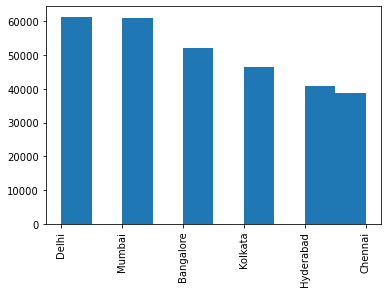

In [37]:
counts, bins, bars = plt.hist(flight2['source_city'], bins = 10, density = False)
plt.xticks(rotation='vertical')
plt.show
print(counts)

#### Departure Time

This variable represents the time that the flight departed the airport. This dataset doesn't include any information regarding the date, so we don't know what date it departed on, just the time. This dataset uses 6 ordinal categories to define the time: Evening, Early Morning, Morning, Afternoon, Night, and Late Night. This makes it a little hard to compare this dataset to the other because we aren't exactly sure what hours belong to which category. Again, the data is pretty evenly distributed, but most flights were flown in the morning and the least late at night. 

[65102. 66790. 71146. 47794. 48015.  1306.]


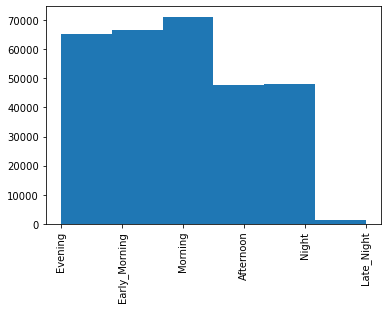

In [38]:
counts, bins, bars = plt.hist(flight2['departure_time'], bins = 6, density = False)
plt.xticks(rotation='vertical')
plt.show
print(counts)

#### Stops

This variable represents the number of stops in between the source and destination locations. It is a categorical variable with three categories: zero, one, and two or more. We can't easily change this to an integer because two would represent two or more. This means that this data would later have to be one hot encoded. The majority of flights only had one stop, 250,863 to be exact. There were more direct flights than flights with two or more stops. 


[ 36004. 250863.  13286.]


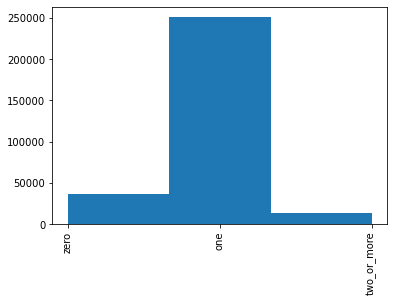

In [39]:
counts, bins, bars = plt.hist(flight2['stops'], bins = 3, density = False)
plt.xticks(rotation='vertical')
plt.show
print(counts)

#### Arrival Time

This variable represents the time that the flight arrives at its destination. This column uses the same ordinal categories as departure time: Evening, Early Morning, Morning, Afternoon, Night, and Late Night. It introduces the same limitations as departure time, this column can't be compared to the other datasets arrival time column with 100% confidence because we don't know what hours define the categories. This column is less equally distributed. The most common arrival times are night, morning, and evening. 

[91538. 62735. 15417. 38139. 78323. 14001.]


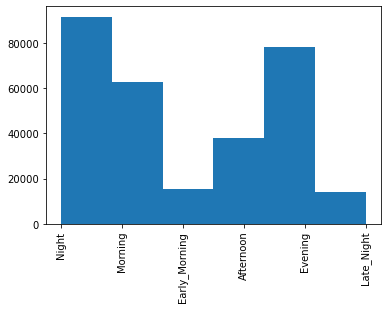

In [40]:
counts, bins, bars = plt.hist(flight2['arrival_time'], bins = 6, density = False)
plt.xticks(rotation='vertical')
plt.show
print(counts)

#### Destination City

This variable represents the location of which the flight is landing at. This is a nominal categorical variable consisting of 6 categories: Mumbai, Bangalore, Kolkata, Hyderabad, Chennai, Delhi. For this variable the flights are pretty evenly distributed with Mumbai and Delhi being the most popular. 

[59097. 51068. 49534. 42726. 40368. 57360.]


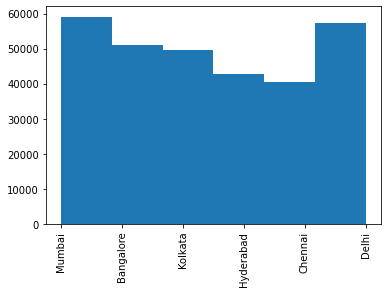

In [41]:
counts, bins, bars = plt.hist(flight2['destination_city'], bins = 6, density = False)
plt.xticks(rotation='vertical')
plt.show
print(counts)

#### Class

This variable represents the class of seating for each flight. It is a nominal categorical feature with 2 categories: business and economy. The other dataset included this information in its "Additional Info" column. As expected because its the cheaper option, the majority of the data consists of economy flights. 

[206666.  93487.]


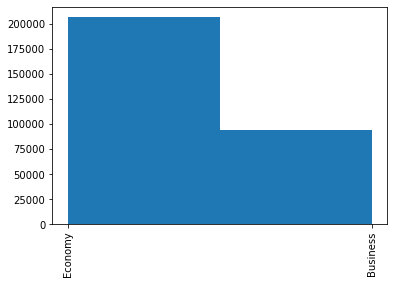

In [42]:
counts, bins, bars = plt.hist(flight2['class'], bins = 2, density = False)
plt.xticks(rotation='vertical')
plt.show
print(counts)

#### Duration

This variable represents the duration of time between departing from the source city and arriving at the destination city in hours. This is a continuous numerical variable represented by a float. For flights that include multiple stops the duration will likely be much higher. The minimum duration is about 50 minutes, the max duration is about 50 hours. The mean duration is 12 hours, which is a little higher than I would expect because I would think most flights are around 3-4 hours. 

In [43]:
flight2.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


#### Days Left

This variable represents how long before the departure date the ticket was booked. This is an interesting variable that wasn't taken into account in the previous dataset. There is a general trend of an increased price the closer to the departure date that you book a flight. This is a discrete numeric value represented by an integer. The min days left is 1 day and the max days left is 49 days. The average days left is 26 which seems like a usual time for book a flight in advance. The histogram reveals that this distribution is pretty even, with a quick decrease as you get within a couple days of the departure date. 

[1927. 4026. 4248. 5077. 5392. 5740. 5703. 5767. 5665. 5822. 6417. 6381.
 6404. 6349. 6340. 6272. 6419. 6602. 6537. 6502. 6479. 6494. 6401. 6542.
 6633. 6573. 6360. 6522. 6397. 6501. 6534. 6585. 6532. 6412. 6291. 6490.
 6476. 6512. 6593. 6531. 6525. 6497. 6472. 6436. 6314. 6160. 6069. 6078.
 6154.]


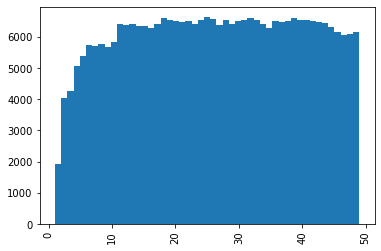

In [44]:
counts, bins, bars = plt.hist(flight2['days_left'], bins = 49, density = False)
plt.xticks(rotation='vertical')
plt.show
print(counts)

#### Price

This variable represents the total price in Indian Rupees for the entire trip. This is a discrete numerical variable. The lowest cost of a trip was 1,105 Rupees and the max cost was 123,071 Rupees. In USD this is a span from $14.50 – $1,613. The mean cost was 20,889 Rupees or $273, which seems reasonable. There were very little flights that cost more than 30,000 Rupees. Looking at the histogram you can see that the majority of tickets cost less than 20,000 Rupees, however there is another peak at around 40,000 - 60,000 Rupees. This is likely because there are a larger number of business class tickets purchased in this dataset than the previous. So we can see the peaks of the two different types of tickets. 

In [45]:
flight2.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


[1.93661e+05 1.64290e+04 6.99100e+03 2.35870e+04 4.26690e+04 1.26380e+04
 3.39200e+03 6.56000e+02 1.15000e+02 1.50000e+01]


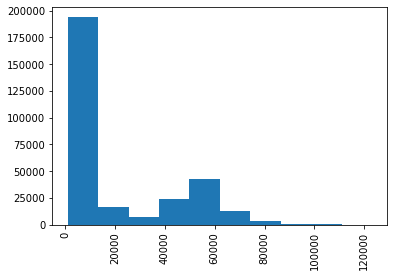

In [46]:
counts, bins, bars = plt.hist(flight2['price'], bins = 10, density = False)
plt.xticks(rotation='vertical')
plt.show
print(counts)

In [47]:
flight2.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In order to use this data to make predictions, we will need to be able to one hot encode or ordinal encode all the categorical variables that we want to use in our model, but that can be done later when we are ready to make our model. 

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

In [48]:
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10384,Air India,2019-12-05,Mumbai,Hyderabad,BOM → HYD,19:30,20:45,75,0,No info,3626
1416,Air India,2019-03-18,Mumbai,Hyderabad,BOM → HYD,19:30,20:45,75,0,No info,2051
3708,Air India,2019-01-05,Mumbai,Hyderabad,BOM → HYD,19:30,20:45,75,0,No info,3101
7239,Air India,2019-03-24,Mumbai,Hyderabad,BOM → HYD,19:30,20:45,75,0,No info,2576
5060,Air India,2019-06-06,Mumbai,Hyderabad,BOM → HYD,19:30,20:45,75,0,No info,3101


In [49]:
flight2.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In order to merge the datasets I first want to look at all the columns and see which ones they have in common. Then I want to make sure that the columns that they have in common have the same column name and data types. For the columns that they don't have in common, I want to mirror those columns into the other dataset. Now they should have identical columns. At this point I can merge the two datasets. Then I can check the unique values of each column and see if there are similar values with slightly different names. I can change those to minimize the unique values. To make sure the merge went correctly I can check the datatypes of each column and the number of rows and compare it with the number of rows I was expecting. 

First I will see what columns they have in common. These appear to be airline, source city, departure time, stops, arrival time, destination city, duration, and price. My first step is going to be to change these column labels in dataset 2 to match dataset 1. 

In [50]:
flight2 = flight2.rename({'airline': 'Airline', 'source_city': 'Source', 'destination_city': 'Destination',
                         'departure_time': 'Dep_Time', 'arrival_time': 'Arrival_Time', 'stops': 'Total_Stops',
                         'duration': 'Duration', 'price': 'Price'}, axis=1)
flight2.head()

,Airline,flight,Source,Dep_Time,Total_Stops,Arrival_Time,Destination,class,Duration,days_left,Price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Now Airline, Source, and Destination should merge smoothly. My next step will be to make sure the Departure and Arrival times can merge. Dataset 1 has times in the format HH:MM, and dataset 2 has times as categories. My only option is to try to fit the times into the categories used in dataset 2. As previously stated, the challenge with this is dataset 2 provides no time defintion for each category, so I will have to come up with these on my own:



    Late Night:     00:00 - 03:59

    Early Morning:  04:00 - 07:59

    Morning:        08:00 - 11:59

    Afternoon:      12:00 - 15:59

    Evening:        16:00 - 19:59

    Night:          20:00 - 23:59


With six categories and 24 hours in a day, I allowed each category to have a time frame of 4 hours. Now we have our bins. Next we need to change dataset 1 arrival and departure times to integers. 

In [51]:
flight1['Dep_Time'] = [c.replace(':', '') for c in flight1['Dep_Time']]
flight1['Arrival_Time'] = [c.replace(':', '') for c in flight1['Arrival_Time']]
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10384,Air India,2019-12-05,Mumbai,Hyderabad,BOM → HYD,1930,2045,75,0,No info,3626
1416,Air India,2019-03-18,Mumbai,Hyderabad,BOM → HYD,1930,2045,75,0,No info,2051
3708,Air India,2019-01-05,Mumbai,Hyderabad,BOM → HYD,1930,2045,75,0,No info,3101
7239,Air India,2019-03-24,Mumbai,Hyderabad,BOM → HYD,1930,2045,75,0,No info,2576
5060,Air India,2019-06-06,Mumbai,Hyderabad,BOM → HYD,1930,2045,75,0,No info,3101


In [52]:
flight1['Dep_Time'] = flight1['Dep_Time'].astype(int)
flight1['Arrival_Time'] = flight1['Arrival_Time'].astype(int)
flight1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 10384 to 10456
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10681 non-null  object        
 1   Date_of_Journey  10681 non-null  datetime64[ns]
 2   Source           10681 non-null  object        
 3   Destination      10681 non-null  object        
 4   Route            10681 non-null  object        
 5   Dep_Time         10681 non-null  int64         
 6   Arrival_Time     10681 non-null  int64         
 7   Duration         10681 non-null  int64         
 8   Total_Stops      10681 non-null  int64         
 9   Additional_Info  10681 non-null  object        
 10  Price            10681 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 1001.3+ KB


Now we can put them in our defined bins.

In [53]:
flight1['bins'] = pd.cut(x=flight1['Dep_Time'], bins=[0, 400, 800, 1200, 1600, 2000, 2359],
                    labels=['Late Night', 'Early Morning', 'Morning',
                            'Afternoon', 'Evening', 'Night']) 
flight1['Dep_Time'] = flight1['bins']
flight1 = flight1.drop('bins',1)
flight1.head()

/var/folders/sc/3djkvdx57jb0ycqsbk23w5pc0000gn/T/ipykernel_82152/2395054628.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  flight1 = flight1.drop('bins',1)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10384,Air India,2019-12-05,Mumbai,Hyderabad,BOM → HYD,Evening,2045,75,0,No info,3626
1416,Air India,2019-03-18,Mumbai,Hyderabad,BOM → HYD,Evening,2045,75,0,No info,2051
3708,Air India,2019-01-05,Mumbai,Hyderabad,BOM → HYD,Evening,2045,75,0,No info,3101
7239,Air India,2019-03-24,Mumbai,Hyderabad,BOM → HYD,Evening,2045,75,0,No info,2576
5060,Air India,2019-06-06,Mumbai,Hyderabad,BOM → HYD,Evening,2045,75,0,No info,3101


In [54]:
flight1['bins'] = pd.cut(x=flight1['Arrival_Time'], bins=[0, 400, 800, 1200, 1600, 2000, 2359],
                    labels=['Late Night', 'Early Morning', 'Morning',
                            'Afternoon', 'Evening', 'Night']) 
flight1['Arrival_Time'] = flight1['bins']
flight1 = flight1.drop('bins',1)
flight1.head()

/var/folders/sc/3djkvdx57jb0ycqsbk23w5pc0000gn/T/ipykernel_82152/2025620740.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  flight1 = flight1.drop('bins',1)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10384,Air India,2019-12-05,Mumbai,Hyderabad,BOM → HYD,Evening,Night,75,0,No info,3626
1416,Air India,2019-03-18,Mumbai,Hyderabad,BOM → HYD,Evening,Night,75,0,No info,2051
3708,Air India,2019-01-05,Mumbai,Hyderabad,BOM → HYD,Evening,Night,75,0,No info,3101
7239,Air India,2019-03-24,Mumbai,Hyderabad,BOM → HYD,Evening,Night,75,0,No info,2576
5060,Air India,2019-06-06,Mumbai,Hyderabad,BOM → HYD,Evening,Night,75,0,No info,3101


Now we can focus on the stops column. Because of the categories in dataset 2, we will need to do a similar process as above. We need to fit the integers from dataset 1 into the bins from dataset 2. However, I can use a different method because there are so few categories. 

In [55]:
flight1['Total_Stops'] = flight1['Total_Stops'].astype(str)
flight1['Total_Stops']= [c.replace('0', 'Zero') for c in flight1['Total_Stops']]
flight1['Total_Stops']= [c.replace('1', 'One') for c in flight1['Total_Stops']]
flight1['Total_Stops']= [c.replace('2', 'Two or more') for c in flight1['Total_Stops']]
flight1['Total_Stops']= [c.replace('3', 'Two or more') for c in flight1['Total_Stops']]
flight1['Total_Stops']= [c.replace('4', 'Two or more') for c in flight1['Total_Stops']]
flight2['Total_Stops']= [c.replace('zero', 'Zero') for c in flight2['Total_Stops']]
flight2['Total_Stops']= [c.replace('one', 'One') for c in flight2['Total_Stops']]
flight2['Total_Stops']= [c.replace('two_or_more', 'Two or more') for c in flight2['Total_Stops']]

Next we can work with the duration column. The duration in dataset 1 is in minutes, and the duration in dataset 2 is in hours. I will change dataset 1 to hours because I think its easier to understand larger values than if they were in minutes. This should be a simply math equation, but the datatype of the column in dataset one will change from an integer to a float. 

In [56]:
flight1['Duration'] = flight1['Duration'].astype(float)
flight1['Duration'] = flight1['Duration']/60
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10384,Air India,2019-12-05,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,3626
1416,Air India,2019-03-18,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,2051
3708,Air India,2019-01-05,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,3101
7239,Air India,2019-03-24,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,2576
5060,Air India,2019-06-06,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,3101


Now all the similar columns between the datasets should be able to merge smoothly.

In [57]:
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10384,Air India,2019-12-05,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,3626
1416,Air India,2019-03-18,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,2051
3708,Air India,2019-01-05,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,3101
7239,Air India,2019-03-24,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,2576
5060,Air India,2019-06-06,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,3101


In [58]:
flight2.head()

,Airline,flight,Source,Dep_Time,Total_Stops,Arrival_Time,Destination,class,Duration,days_left,Price
0,SpiceJet,SG-8709,Delhi,Evening,Zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,Zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,Zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,Zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,Zero,Morning,Mumbai,Economy,2.33,1,5955


Now I will begin to add the columns that are in dataset 1 (and not dataset 2) to dataset 2. This includes Date of Journey, Route, and Additional Info. Since dataset 2 will have no values for this column I will just make them NaN values, but for Additional Info I can make the value "No info". 

In [59]:
flight2["Date_of_Journey"] = np.nan
flight2['Route'] = np.nan
flight2['Additional_Info'] = 'No info'
flight2.head()

,Airline,flight,Source,Dep_Time,Total_Stops,Arrival_Time,Destination,class,Duration,days_left,Price,Date_of_Journey,Route,Additional_Info
0,SpiceJet,SG-8709,Delhi,Evening,Zero,Night,Mumbai,Economy,2.17,1,5953,NaN,NaN,No info
1,SpiceJet,SG-8157,Delhi,Early_Morning,Zero,Morning,Mumbai,Economy,2.33,1,5953,NaN,NaN,No info
2,AirAsia,I5-764,Delhi,Early_Morning,Zero,Early_Morning,Mumbai,Economy,2.17,1,5956,NaN,NaN,No info
3,Vistara,UK-995,Delhi,Morning,Zero,Afternoon,Mumbai,Economy,2.25,1,5955,NaN,NaN,No info
4,Vistara,UK-963,Delhi,Morning,Zero,Morning,Mumbai,Economy,2.33,1,5955,NaN,NaN,No info


I can get rid of the class column in dataset 2 by combining the information into the Additional Info column. In dataset 1 all flights are by default economy, unless otherwise denoted in additional information. I will now implement this in dataset 2. 

In [60]:
flight2['Additional_Info'] = np.where(flight2['class']=='Business', 'Business class', 'No info')

In [61]:
flight2 = flight2.drop('class',1)

/var/folders/sc/3djkvdx57jb0ycqsbk23w5pc0000gn/T/ipykernel_82152/1930763484.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  flight2 = flight2.drop('class',1)


Now I can do the same to dataset 1 (add the columns from dataset 2 that aren't in dataset 1). This consists of flight and days left.

In [62]:
flight1["flight"] = np.nan
flight1["days_left"] = np.nan

In [63]:
flight1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,flight,days_left
10384,Air India,2019-12-05,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,3626,NaN,NaN
1416,Air India,2019-03-18,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,2051,NaN,NaN
3708,Air India,2019-01-05,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,3101,NaN,NaN
7239,Air India,2019-03-24,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,2576,NaN,NaN
5060,Air India,2019-06-06,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,3101,NaN,NaN


In [64]:
flight2.head()

,Airline,flight,Source,Dep_Time,Total_Stops,Arrival_Time,Destination,Duration,days_left,Price,Date_of_Journey,Route,Additional_Info
0,SpiceJet,SG-8709,Delhi,Evening,Zero,Night,Mumbai,2.17,1,5953,NaN,NaN,No info
1,SpiceJet,SG-8157,Delhi,Early_Morning,Zero,Morning,Mumbai,2.33,1,5953,NaN,NaN,No info
2,AirAsia,I5-764,Delhi,Early_Morning,Zero,Early_Morning,Mumbai,2.17,1,5956,NaN,NaN,No info
3,Vistara,UK-995,Delhi,Morning,Zero,Afternoon,Mumbai,2.25,1,5955,NaN,NaN,No info
4,Vistara,UK-963,Delhi,Morning,Zero,Morning,Mumbai,2.33,1,5955,NaN,NaN,No info


In [65]:
cols = list(flight1.columns.values)
cols
flight1 = flight1[['Airline',
         'flight',
         'Date_of_Journey',
         'Source',
         'Destination',
         'Route',
         'Dep_Time',
         'Arrival_Time',
         'Duration',
         'Total_Stops',
         'Additional_Info',
         'days_left',
         'Price']]
flight2 = flight2[['Airline',
         'flight',
         'Date_of_Journey',
         'Source',
         'Destination',
         'Route',
         'Dep_Time',
         'Arrival_Time',
         'Duration',
         'Total_Stops',
         'Additional_Info',
         'days_left',
         'Price']]

In [66]:
flight1.head()

,Airline,flight,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,days_left,Price
10384,Air India,NaN,2019-12-05,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,3626
1416,Air India,NaN,2019-03-18,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,2051
3708,Air India,NaN,2019-01-05,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,3101
7239,Air India,NaN,2019-03-24,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,2576
5060,Air India,NaN,2019-06-06,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,3101


In [67]:
flight2.head()

,Airline,flight,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,days_left,Price
0,SpiceJet,SG-8709,NaN,Delhi,Mumbai,NaN,Evening,Night,2.17,Zero,No info,1,5953
1,SpiceJet,SG-8157,NaN,Delhi,Mumbai,NaN,Early_Morning,Morning,2.33,Zero,No info,1,5953
2,AirAsia,I5-764,NaN,Delhi,Mumbai,NaN,Early_Morning,Early_Morning,2.17,Zero,No info,1,5956
3,Vistara,UK-995,NaN,Delhi,Mumbai,NaN,Morning,Afternoon,2.25,Zero,No info,1,5955
4,Vistara,UK-963,NaN,Delhi,Mumbai,NaN,Morning,Morning,2.33,Zero,No info,1,5955


In [68]:
flight1['flight'] = flight1['flight'].astype(str)
flight2['Date_of_Journey'] = pd.to_datetime(flight2['Date_of_Journey'], errors='coerce')
flight2['Route'] = flight2['Route'].astype(str)
flight2['Dep_Time'] = flight2['Dep_Time'].astype('category')
flight2['Arrival_Time'] = flight2['Arrival_Time'].astype('category')
flight2['days_left'] = flight2['days_left'].astype(float)

In [69]:
flight1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 10384 to 10456
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10681 non-null  object        
 1   flight           10681 non-null  object        
 2   Date_of_Journey  10681 non-null  datetime64[ns]
 3   Source           10681 non-null  object        
 4   Destination      10681 non-null  object        
 5   Route            10681 non-null  object        
 6   Dep_Time         10681 non-null  category      
 7   Arrival_Time     10681 non-null  category      
 8   Duration         10681 non-null  float64       
 9   Total_Stops      10681 non-null  object        
 10  Additional_Info  10681 non-null  object        
 11  days_left        0 non-null      float64       
 12  Price            10681 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 1022.6

In [70]:
flight2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Airline          300153 non-null  object        
 1   flight           300153 non-null  object        
 2   Date_of_Journey  0 non-null       datetime64[ns]
 3   Source           300153 non-null  object        
 4   Destination      300153 non-null  object        
 5   Route            300153 non-null  object        
 6   Dep_Time         300153 non-null  category      
 7   Arrival_Time     300153 non-null  category      
 8   Duration         300153 non-null  float64       
 9   Total_Stops      300153 non-null  object        
 10  Additional_Info  300153 non-null  object        
 11  days_left        300153 non-null  float64       
 12  Price            300153 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(7)
memory 

Now the two datasets have identical column names and datatypes, so they should be able to merge smoothly. 

In [71]:
merged = pd.concat([flight1, flight2], axis=0)
merged.head()

,Airline,flight,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,days_left,Price
10384,Air India,nan,2019-12-05,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,3626
1416,Air India,nan,2019-03-18,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,2051
3708,Air India,nan,2019-01-05,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,3101
7239,Air India,nan,2019-03-24,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,2576
5060,Air India,nan,2019-06-06,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,3101


In [72]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310834 entries, 10384 to 300152
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Airline          310834 non-null  object        
 1   flight           310834 non-null  object        
 2   Date_of_Journey  10681 non-null   datetime64[ns]
 3   Source           310834 non-null  object        
 4   Destination      310834 non-null  object        
 5   Route            310834 non-null  object        
 6   Dep_Time         310834 non-null  object        
 7   Arrival_Time     310834 non-null  object        
 8   Duration         310834 non-null  float64       
 9   Total_Stops      310834 non-null  object        
 10  Additional_Info  310834 non-null  object        
 11  days_left        300153 non-null  float64       
 12  Price            310834 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 33

Dataset 1 had 10681 entries and dataset 2 had 300153 entries. The merged dataset has 310834 entries meaning the two datasets were successfully combined. We can also check the unique values in each column to make sure that the values merged correctly. This will also include a little cleaning up of the values and column labels to make it look more professional. 

In [73]:
merged['Airline'].unique()

array(['Air India', 'SpiceJet', 'Jet Airways', 'IndiGo', 'Vistara',
       'Vistara Premium economy', 'Air Asia', 'GoAir', 'Trujet',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'AirAsia', 'GO_FIRST',
       'Indigo', 'Air_India'], dtype=object)

In [74]:
merged['Airline'] = [c.replace('Air_India', 'Air India') for c in merged['Airline']]
merged['Airline'] = [c.replace('GO_FIRST', 'Go First') for c in merged['Airline']]
merged['Airline'] = [c.replace('AirAsia', 'Air Asia') for c in merged['Airline']]
merged['Airline'] = [c.replace('Indigo', 'IndiGo') for c in merged['Airline']]
merged['Airline'].unique()

array(['Air India', 'SpiceJet', 'Jet Airways', 'IndiGo', 'Vistara',
       'Vistara Premium economy', 'Air Asia', 'GoAir', 'Trujet',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Go First'], dtype=object)

In [75]:
merged = merged.rename({'flight': 'Flight', 'Date_of_Journey': 'Date of Journey',
                        'Dep_Time': 'Departure Time', 'Arrival_Time': 'Arrival Time',
                       'Total_Stops': 'Total Stops', 'Additional_Info': 'Additional Info',
                       'days_left': 'Days Left'}, axis=1)
merged['Source'].unique()

array(['Mumbai', 'Chennai', 'Kolkata', 'Banglore', 'Delhi', 'Bangalore',
       'Hyderabad'], dtype=object)

In [76]:
merged['Source'] = [c.replace('Banglore', 'Bangalore') for c in merged['Source']]
merged['Source'].unique()

array(['Mumbai', 'Chennai', 'Kolkata', 'Bangalore', 'Delhi', 'Hyderabad'],
      dtype=object)

In [77]:
merged['Destination'].unique()

array(['Hyderabad', 'Kolkata', 'Banglore', 'Delhi', 'New Delhi', 'Cochin',
       'Mumbai', 'Bangalore', 'Chennai'], dtype=object)

In [78]:
merged['Destination'] = [c.replace('Banglore', 'Bangalore') for c in merged['Destination']]
merged['Destination'].unique()

array(['Hyderabad', 'Kolkata', 'Bangalore', 'Delhi', 'New Delhi',
       'Cochin', 'Mumbai', 'Chennai'], dtype=object)

In [79]:
merged['Departure Time'].unique()

array(['Evening', 'Night', 'Afternoon', 'Early Morning', 'Late Night',
       'Morning', 'Early_Morning', 'Late_Night'], dtype=object)

In [80]:
merged['Departure Time'] = [c.replace('Early_Morning', 'Early Morning') for c in merged['Departure Time']]
merged['Departure Time'] = [c.replace('Late_Night', 'Late Night') for c in merged['Departure Time']]
merged['Departure Time'].unique()

array(['Evening', 'Night', 'Afternoon', 'Early Morning', 'Late Night',
       'Morning'], dtype=object)

In [81]:
merged['Arrival Time'].unique()

array(['Night', 'Afternoon', 'Early Morning', 'Morning', 'Evening',
       'Late Night', 'Early_Morning', 'Late_Night'], dtype=object)

In [82]:
merged['Arrival Time'] = [c.replace('Early_Morning', 'Early Morning') for c in merged['Arrival Time']]
merged['Arrival Time'] = [c.replace('Late_Night', 'Late Night') for c in merged['Arrival Time']]
merged['Arrival Time'].unique()

array(['Night', 'Afternoon', 'Early Morning', 'Morning', 'Evening',
       'Late Night'], dtype=object)

In [83]:
merged['Total Stops'].unique()

array(['Zero', 'Two or more', 'One'], dtype=object)

In [84]:
merged['Additional Info'].unique()

array(['No info', 'No check-in baggage included',
       'In-flight meal not included', 'Red-eye flight', 'Business class',
       'Change airports', '1 Long layover', '1 Short layover',
       '2 Long layover'], dtype=object)

In [85]:
merged.head()

,Airline,Flight,Date of Journey,Source,Destination,Route,Departure Time,Arrival Time,Duration,Total Stops,Additional Info,Days Left,Price
10384,Air India,nan,2019-12-05,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,3626
1416,Air India,nan,2019-03-18,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,2051
3708,Air India,nan,2019-01-05,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,3101
7239,Air India,nan,2019-03-24,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,2576
5060,Air India,nan,2019-06-06,Mumbai,Hyderabad,BOM → HYD,Evening,Night,1.25,Zero,No info,NaN,3101


After analzying the unique categories for each column and confirming the total number of rows in the data, we can assure the data has been merged successfully. 

### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

My target variable will be price, as I am trying to predict the price of airfare given other flight datapoints. My predictor variables will include airline, source, destination, duration, total stops, departure time, and arrival time. I have chosen to leave out some of the variables that have NaN values simply because I will be missing out on a lot of entries. I think all of the variables that I have chosen should have a direct effect on the price, some more than others. I would assume that there are some more luxurious airlines and some cheaper options. I chose source and destination because there are likely some locations that are more popular than others and might be charged more, also some locations might have cheap flights because they are hubs. I chose duration because usually you can expect a longer flight to be more expensive. I chose total stops because I figured the more layovers you have, the less expensive the flight would be. I chose departure and arrival time because I thought that flights at more inconvenient times like late at night or early morning would be less expensive. 

I will first run a correlation matrix to see how the variables correlate with eachother. To do this I need to create a new dataframe with only the variables I want to explore. 

In [86]:
study = merged.drop(['Flight', 'Date of Journey', 'Route', 'Additional Info', 'Days Left'], 1)
study.head()

/var/folders/sc/3djkvdx57jb0ycqsbk23w5pc0000gn/T/ipykernel_82152/3994074313.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  study = merged.drop(['Flight', 'Date of Journey', 'Route', 'Additional Info', 'Days Left'], 1)


,Airline,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
10384,Air India,Mumbai,Hyderabad,Evening,Night,1.25,Zero,3626
1416,Air India,Mumbai,Hyderabad,Evening,Night,1.25,Zero,2051
3708,Air India,Mumbai,Hyderabad,Evening,Night,1.25,Zero,3101
7239,Air India,Mumbai,Hyderabad,Evening,Night,1.25,Zero,2576
5060,Air India,Mumbai,Hyderabad,Evening,Night,1.25,Zero,3101


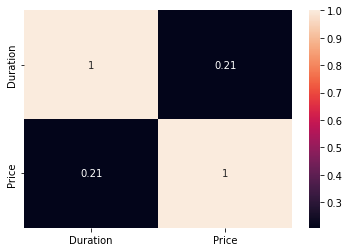

In [87]:
corrMatrix = study.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [88]:
study.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310834 entries, 10384 to 300152
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Airline         310834 non-null  object 
 1   Source          310834 non-null  object 
 2   Destination     310834 non-null  object 
 3   Departure Time  310834 non-null  object 
 4   Arrival Time    310834 non-null  object 
 5   Duration        310834 non-null  float64
 6   Total Stops     310834 non-null  object 
 7   Price           310834 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 21.3+ MB


Seaborn can only show the heatmap for the numerical values. I will be using the Dython library to show a heatmap of all variables including the categorical ones. 

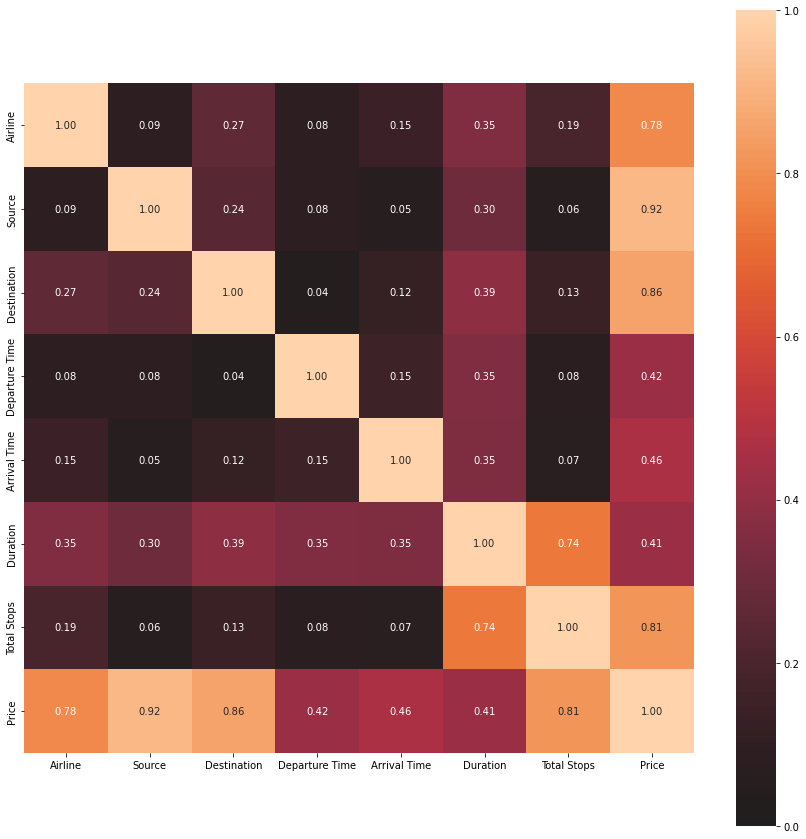

{'corr':                  Airline    Source  Destination  Departure Time  Arrival Time  \
 Airline         1.000000  0.093359     0.265477        0.084490      0.145253   
 Source          0.093359  1.000000     0.237943        0.081964      0.049640   
 Destination     0.265477  0.237943     1.000000        0.041722      0.124707   
 Departure Time  0.084490  0.081964     0.041722        1.000000      0.149296   
 Arrival Time    0.145253  0.049640     0.124707        0.149296      1.000000   
 Duration        0.354633  0.300809     0.390162        0.351846      0.347170   
 Total Stops     0.190440  0.061367     0.133958        0.077964      0.070114   
 Price           0.783803  0.921859     0.857049        0.417512      0.463048   
 
                 Duration  Total Stops     Price  
 Airline         0.354633     0.190440  0.783803  
 Source          0.300809     0.061367  0.921859  
 Destination     0.390162     0.133958  0.857049  
 Departure Time  0.351846     0.077964  0.417512

In [89]:
from dython.nominal import associations

associations(study, nominal_columns = 'all', figsize = (15,15))

From this heatmap we can see correlations between our target variable and predictor variables, but also predictor variables and other predictor variables. These correlation values can only be between 0 and 1, meaning there are no negative values. A strong correlation in this instance can be either negative or positive. This heatmap shows us there are strong correlations between Source/Destination, Total Stops, Airline, and our predictor variable price. It also reveals a strong correlation between two predictor variables: Duration and Totals Stops. This is expected because as the number of stops increases, the total duration will also increase. The other correlations are rather weak and not substantial. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Air India'),
  Text(1, 0, 'SpiceJet'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'IndiGo'),
  Text(4, 0, 'Vistara'),
  Text(5, 0, 'Vistara Premium economy'),
  Text(6, 0, 'Air Asia'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'Trujet'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers'),
  Text(11, 0, 'Multiple carriers Premium economy'),
  Text(12, 0, 'Go First')])

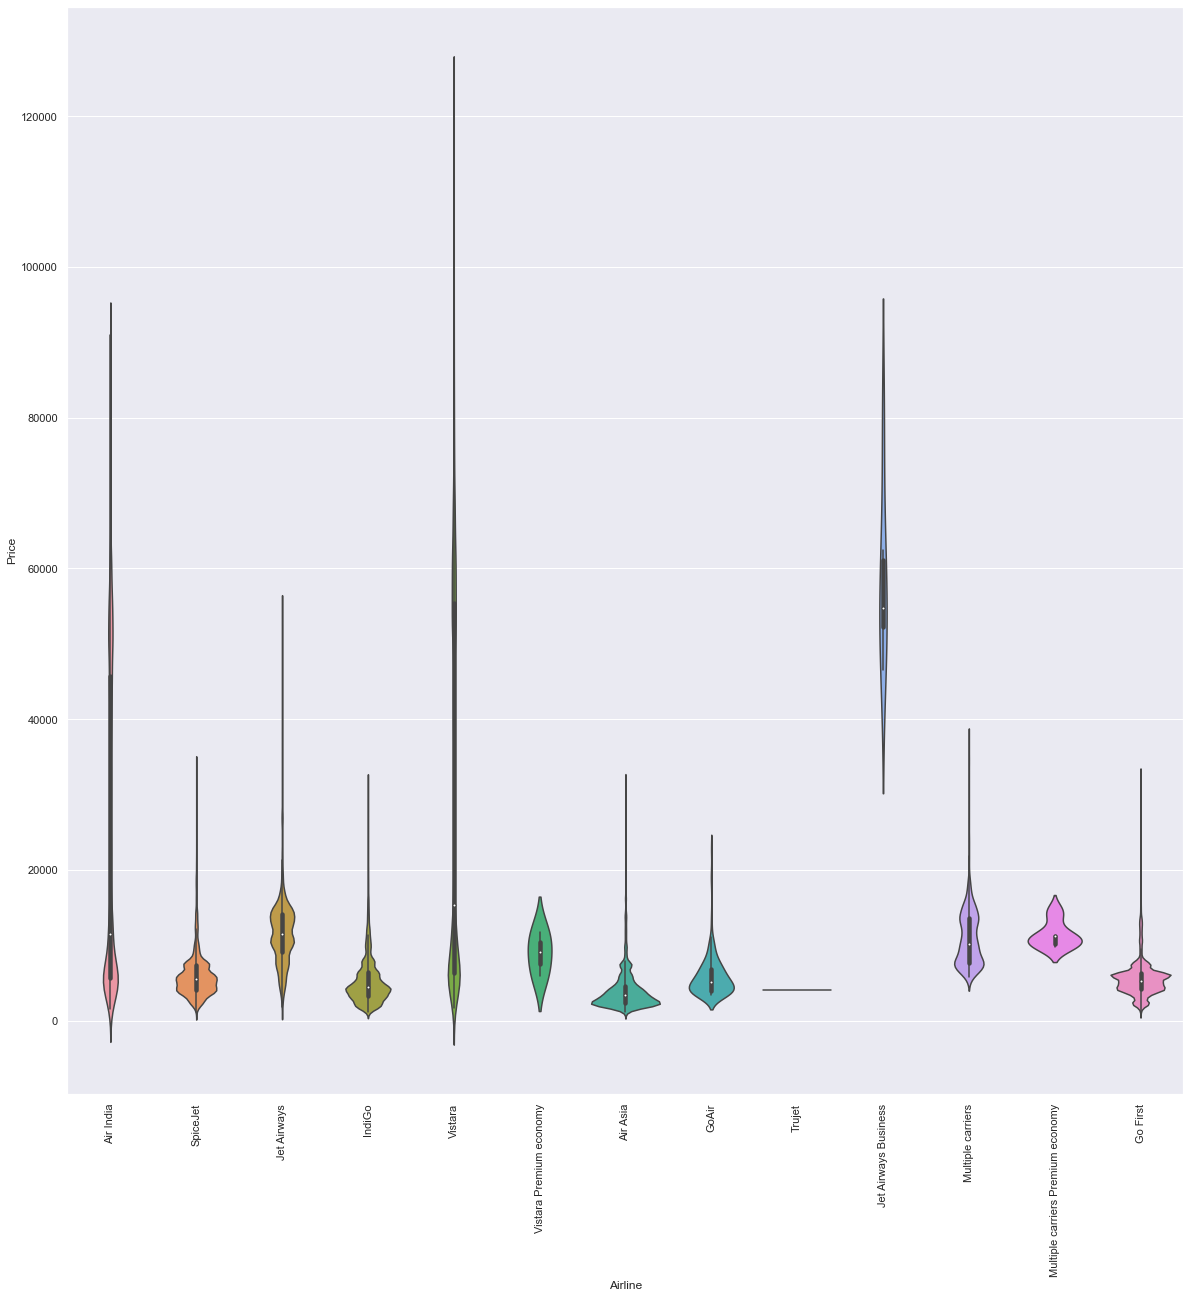

In [98]:
ax = sns.violinplot(x=study['Airline'], y=study['Price'])
sns.set(rc={'figure.figsize':(40,40)})
plt.xticks(rotation=90)

This is a violin plot of each airline and their relationship with fare prices. We can immediately see that most of the high fare prices came from Air India, Vistara, and Jet Airways Business. Jet Airways Business entire distribution of fare prices was higher than the rest simply because it is the Jet Airways airline with Business class seating, which we know to be higher. In other words it doesn't include Jet Airways economy fare prices. Vistara and Air India on the other hand, have a range of both high and low prices, but have much more higher prices than very low prices. This could be for other reasons such as these two airlines are the only ones that fly to further destinations, or they are the only ones that offer more expensive seating/luggage options. All we can take away from this is that Vistara, Air India, and Jet Airways Business give you the opportunity to spend more. 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Chennai'),
  Text(2, 0, 'Kolkata'),
  Text(3, 0, 'Bangalore'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

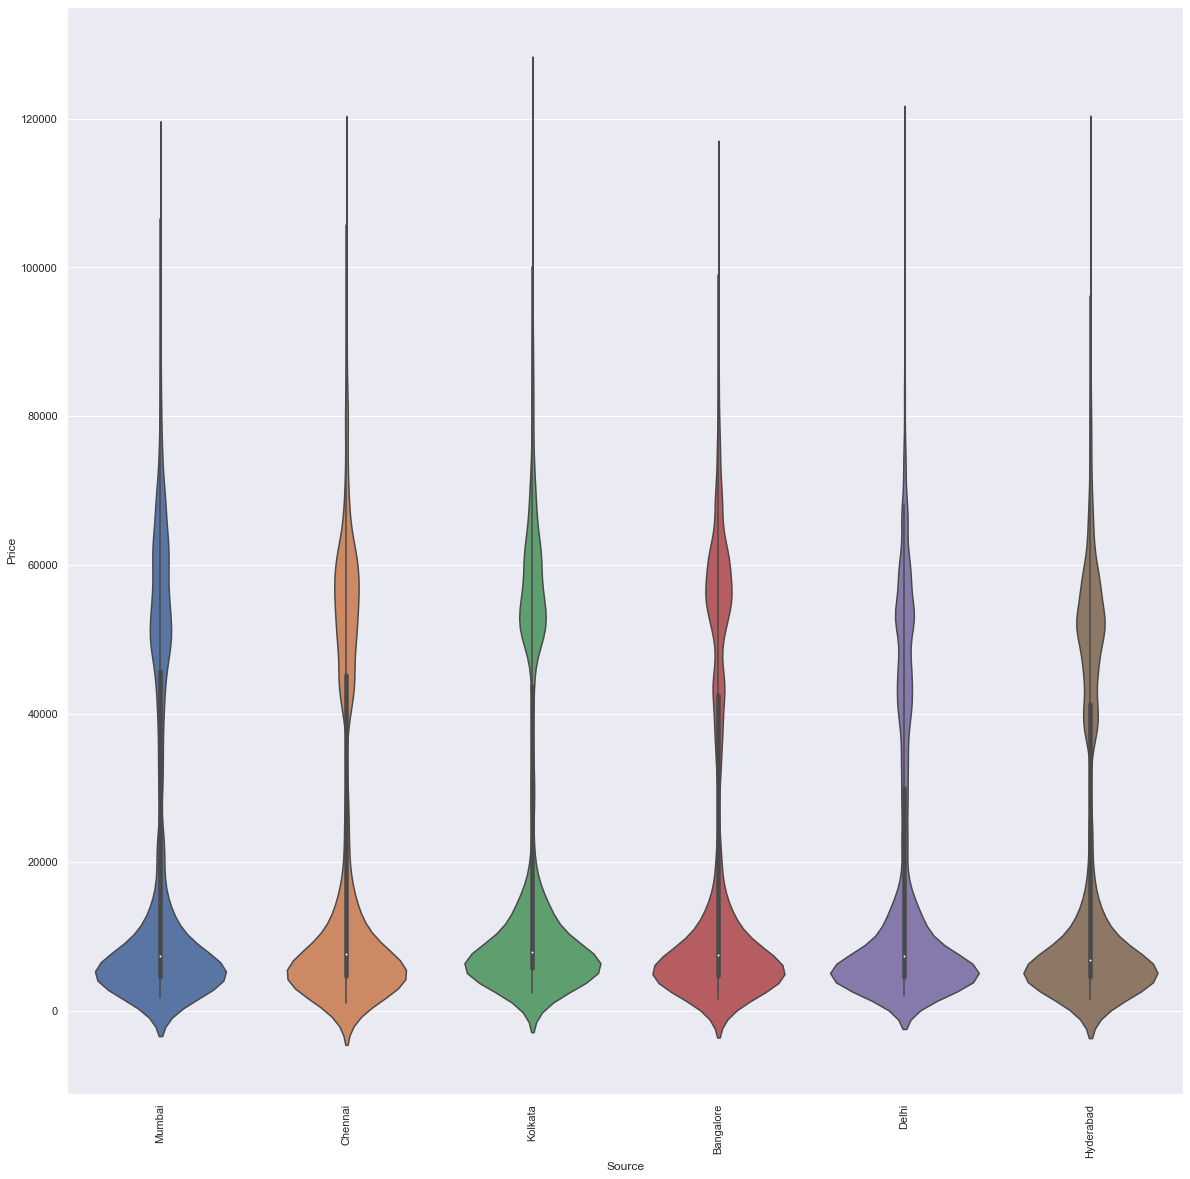

In [101]:
ax = sns.violinplot(x=study['Source'], y=study['Price'])
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90)

This violin plot shows us a pretty equal distribution between pricing for the various source locations. One thing that is immediately evident is the smaller bulge above the main bulge. This is likely due to purchasing of a higher class such as Business. It's also interesting that this bulge seems to be at the same general point across all locations, meaning no matter where you go a Business class ticket costs generally the same. Delhi seems to have a skinny top meaning less people are purchasing higher priced fares when traveling from Delhi. 

Text(0.5, 1.0, 'Destination v Price')

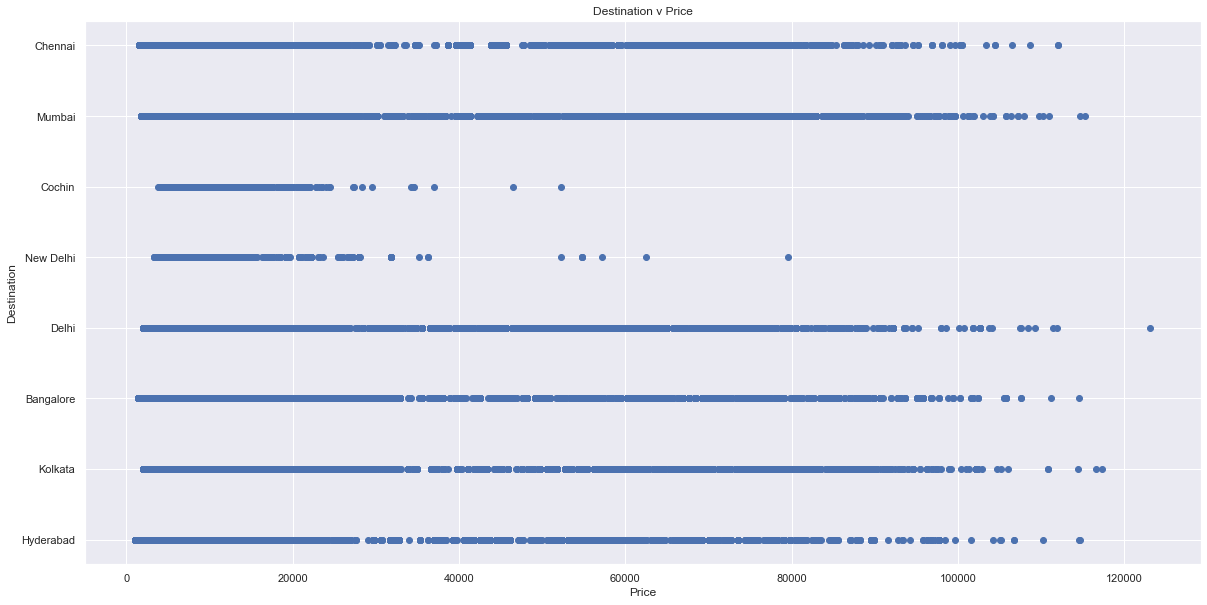

In [106]:
plt.scatter(study['Price'], study['Destination'])
plt.ylabel('Destination')
plt.xlabel('Price')
plt.title('Destination v Price')

This scatterplot shows the distribution of flight prices in relation to the destination of the flights. Immediately we can see that Cochin and New Delhi have nearly no flight prices over 40,000 Rupees whereas all the other destinations have many. This could be because Cochin and New Delhi are smaller airports and don't take in as many flights from far away, so their rates may be cheaper. It could also be because the planes that fly to these destinations don't have higher class fares available for purchase because the planes are outdated. Other than that this chart shows that the other locations have fares that are pretty evenly distributed, with Mumbai looking to be the most evenly distributed.

(array([0, 1, 2]),
 [Text(0, 0, 'Zero'), Text(1, 0, 'Two or more'), Text(2, 0, 'One')])

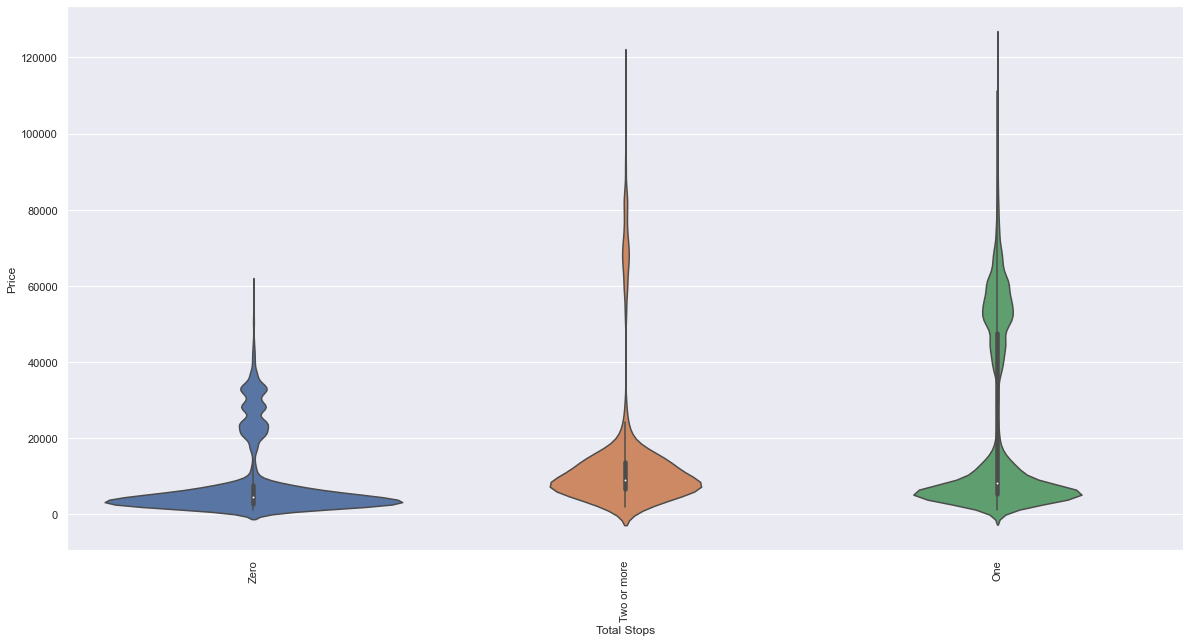

In [105]:
ax = sns.violinplot(x=study['Total Stops'], y=study['Price'])
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90)

This violin plot shows the relationship between the total number of stops and the total price for a flight. The direct flights, the ones with zero stops, seem to have the lowest fares and the highest distribution of low fares. You can again see a separation in the bulges representing a lower class and higher class fare. This is less evident in the one and two or more total stops. The one and two or more total stop flight prices reach much higher. This could be because its a longer flight so people are willing to pay more for first class type seating, however I would think we would see a bulge very high up if this were the case. Another reason could be that the more stops there are the more likely your destination is further away, meaning the price would be greater. This could potentially be further explored by adding t